# Практическая работа №1: Основы анализа и моделирования социальных сетей¶
Выполнила студентка гр. 0383 Александрович Валерия. Вариант №1

## Цель работы
Овладеть навыками работы с математическими пакетами для моделирования, визуализации и анализа социальных сетей.

## Основные теоретические положения

Актор - дискретная, индивидуальная, корпоративная или коллективная социальная единица.
Реляционная связь - свойство, описывающее взаимодействие между двумя акторами.
Подгруппа - любое подмножество акторов и все связи между ними.
Группа - совокупность всех акторов, связи между которыми будут изучены.
Социальная сеть - объект, представляющий совой совокупность конечного набора акторов и отношения или отношений, определенных на них.

Социоматрица - матрица размера gxg (g - количество узлов), описывающая смежные узлы сети.

Пятичисловая сводка сети:
 - Размер сети - количество акторов в ней.
 - Плотность сети - доля имеющихся связей по отношению к максимально возможному количеству связей $ \frac{L}{n(n-1)/2} $
 - Число компонент в сети. Компонента связности графа — некоторое множество вершин графа такое, что для любых двух вершин из этого множества существует путь из одной в другую, и не существует пути из вершины этого множества в вершину не из этого множества.
 - Диаметр сети - наибольшая длина любого из кратчайших путей между всеми парами узлов.
 - Коэффициент кластеризации сети - мера степени, с которой узлы в сети стремятся объединяться в кластеры. Численно равна доле закрытых триад к общему количеству триад.

Средняя степень узлов
    $ \frac{1}{g}\sum{d(n_i)}$

Дисперсия
    $ \frac{1}{g}\sum{d(n_i)-\overline{d}}$
    
Мера центральности - показатель центральности или близости к центру сети. Она определяет наиболее важные узлы.

Меры центральности:
 - По степени
    $C_d(n_i) = d(n_i)$, $C_d'(n_i) = \frac{d(n_i)}{g-1}$
 - По близости
    $C_c(n_i) = \frac{1}{\sum{d(n_i; n_j)}}$, $C_c'(n_i) = (g-1)C_c(n_i)$
 - По посредницеству
    $C_b(n_i) = \sum{g_{ij}(n_i)/g_{jk}}$
 - По информации
    $C_i(n_i) = \frac{1}{C_{ij} + \frac{T-2R}{g}}$
    
Престиж - мера, характеризующая акторов и большим количеством входных связей.
 - По степени
    $P_d(n_i) = d_I(n_i)$, $P_d'(n_i) = \frac{d_I(n_i)}{g-1}$
 - По близости
    $P_p(n_i) = \frac{num(I_i)/(g-1)}{\sum{d(n_j; n_i)/num(I)}}$, $P_p'(n_i) = \frac{1}{g}\sum{P_p(n_i)}$

## Постановка задачи
С помощью математических пакетов и соответствующих библиотек провести анализ заданных социальных сетей вычислить описательные характеристики. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

**При выполнении работы использовались следующие пакеты:** igraph, statnet, sna.

1. Извлечем социоматрицу из файла florentine_business.csv. Выведем полученную социоматрицу на экран.

In [ ]:
data <- read.table("florentine_business.csv", header=TRUE, sep = ',') #считывание матрицы
rownames(data) <- colnames(data) # замена имен строк
print(data)

Результат:

|              	| Acciaiuoli 	| Albizzi 	| Barbadori 	| Bischeri 	| Castellani 	| Ginori 	| Guadagni 	| Lamberteschi 	| Medici 	| Pazzi 	| Peruzzi 	| Pucci 	| Ridolfi 	| Salviati 	| Strozzi 	| Tornabuoni 	|
|--------------	|------------	|---------	|-----------	|----------	|------------	|--------	|----------	|--------------	|--------	|-------	|---------	|-------	|---------	|----------	|---------	|------------	|
| Acciaiuoli   	| 0          	| 0       	| 0         	| 0        	| 0          	| 0      	| 0        	| 0            	| 0      	| 0     	| 0       	| 0     	| 0       	| 0        	| 0       	| 0          	|
| Albizzi      	| 0          	| 0       	| 0         	| 0        	| 0          	| 0      	| 0        	| 0            	| 0      	| 0     	| 0       	| 0     	| 0       	| 0        	| 0       	| 0          	|
| Barbadori    	| 0          	| 0       	| 0         	| 0        	| 1          	| 1      	| 0        	| 0            	| 1      	| 0     	| 1       	| 0     	| 0       	| 0        	| 0       	| 0          	|
| Bischeri     	| 0          	| 0       	| 0         	| 0        	| 0          	| 0      	| 1        	| 1            	| 0      	| 0     	| 1       	| 0     	| 0       	| 0        	| 0       	| 0          	|
| Castellani   	| 0          	| 0       	| 1         	| 0        	| 0          	| 0      	| 0        	| 1            	| 0      	| 0     	| 1       	| 0     	| 0       	| 0        	| 0       	| 0          	|
| Ginori       	| 0          	| 0       	| 1         	| 0        	| 0          	| 0      	| 0        	| 0            	| 1      	| 0     	| 0       	| 0     	| 0       	| 0        	| 0       	| 0          	|
| Guadagni     	| 0          	| 0       	| 0         	| 1        	| 0          	| 0      	| 0        	| 1            	| 0      	| 0     	| 0       	| 0     	| 0       	| 0        	| 0       	| 0          	|
| Lamberteschi 	| 0          	| 0       	| 0         	| 1        	| 1          	| 0      	| 1        	| 0            	| 0      	| 0     	| 1       	| 0     	| 0       	| 0        	| 0       	| 0          	|
| Medici       	| 0          	| 0       	| 1         	| 0        	| 0          	| 1      	| 0        	| 0            	| 0      	| 1     	| 0       	| 0     	| 0       	| 1        	| 0       	| 1          	|
| Pazzi        	| 0          	| 0       	| 0         	| 0        	| 0          	| 0      	| 0        	| 0            	| 1      	| 0     	| 0       	| 0     	| 0       	| 0        	| 0       	| 0          	|
| Peruzzi      	| 0          	| 0       	| 1         	| 1        	| 1          	| 0      	| 0        	| 1            	| 0      	| 0     	| 0       	| 0     	| 0       	| 0        	| 0       	| 0          	|
| Pucci        	| 0          	| 0       	| 0         	| 0        	| 0          	| 0      	| 0        	| 0            	| 0      	| 0     	| 0       	| 0     	| 0       	| 0        	| 0       	| 0          	|
| Ridolfi      	| 0          	| 0       	| 0         	| 0        	| 0          	| 0      	| 0        	| 0            	| 0      	| 0     	| 0       	| 0     	| 0       	| 0        	| 0       	| 0          	|
| Salviati     	| 0          	| 0       	| 0         	| 0        	| 0          	| 0      	| 0        	| 0            	| 1      	| 0     	| 0       	| 0     	| 0       	| 0        	| 0       	| 0          	|
| Strozzi      	| 0          	| 0       	| 0         	| 0        	| 0          	| 0      	| 0        	| 0            	| 0      	| 0     	| 0       	| 0     	| 0       	| 0        	| 0       	| 0          	|
| Tornabuoni   	| 0          	| 0       	| 0         	| 0        	| 0          	| 0      	| 0        	| 0            	| 1      	| 0     	| 0       	| 0     	| 0       	| 0        	| 0       	| 0          	|

2. Преобразуем социоматрицу в список рёбер. Выведем первые 5 элементов списка рёбер.

In [ ]:
DF <- data.frame(data)
socio.matrix <- data.matrix(DF)
edges <- get.edgelist(graph.adjacency(socio.matrix))
edges <- as_data_frame(simplify(graph_from_data_frame(edges, directed=FALSE)))
print(edges[c(1:5), c(1:2)])

Результат:

|      	| [,1]        	| [,2]         	|
|------	|-------------	|--------------	|
| [1,] 	| "Barbadori" 	| "Castellani" 	|
| [2,] 	| "Barbadori" 	| "Ginori"     	|
| [3,] 	| "Barbadori" 	| "Medici"     	|
| [4,] 	| "Barbadori" 	| "Peruzzi"    	|
| [5,] 	| "Bischeri"  	| "Guadagni"   	|

3. Присвоим имена столбцам и строкам социоматрицы (было выполнено в пункте 1).

In [ ]:
print(socio.matrix)

Результат аналогичен матрице, представленной в пункте 1.

4. С помощью соответствующих функций по полученной социоматрице построим ненаправленную сеть.

In [ ]:
net <- graph_from_adjacency_matrix(socio.matrix, mode = "undirected")
net <- simplify(net)
# функции передается социоматрица и задается мод "ненаправленный"

5. Отобразим сеть с помощью алгоритмов укладки Фрюхтермана–Рейнгольда и Камада–Каваи.

In [ ]:
coords <- layout_with_fr(net) #алгоритм Фрюхтермана–Рейнгольда 
plot(net, layout=coords, vertex.size=40, edge.width = 5, rescale=FALSE,
      xlim=range(coords[,1]), ylim=range(coords[,2]), vertex.label.dist=0,
      vertex.label.color="black", vertex.color = "white", edge.color = "black")

Результат:

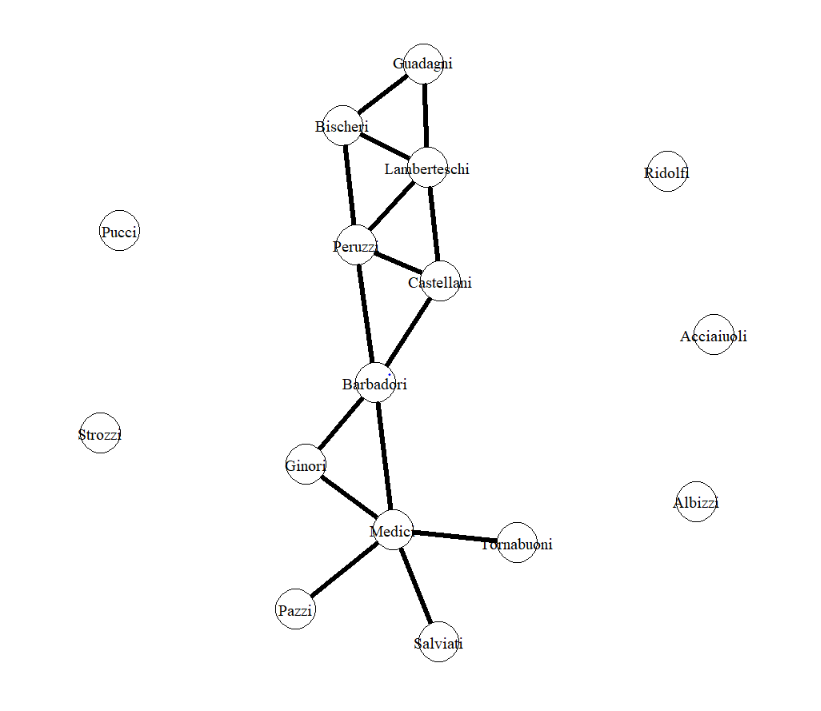

In [ ]:
coords <- layout_with_kk(net, epsilon = 400) #алгоритм Камада–Каваи
#epsilon используется, так как при его дефолтном значении одно ребро накладывается на другое, 
#что мешает корректному восприятию графа.
plot(net, layout=coords, vertex.size=40, edge.width = 5, rescale=FALSE,
      xlim=range(coords[,1]), ylim=range(coords[,2]), vertex.label.dist=0,
      vertex.label.color="black", vertex.color = "white", edge.color = "black")

Результат:

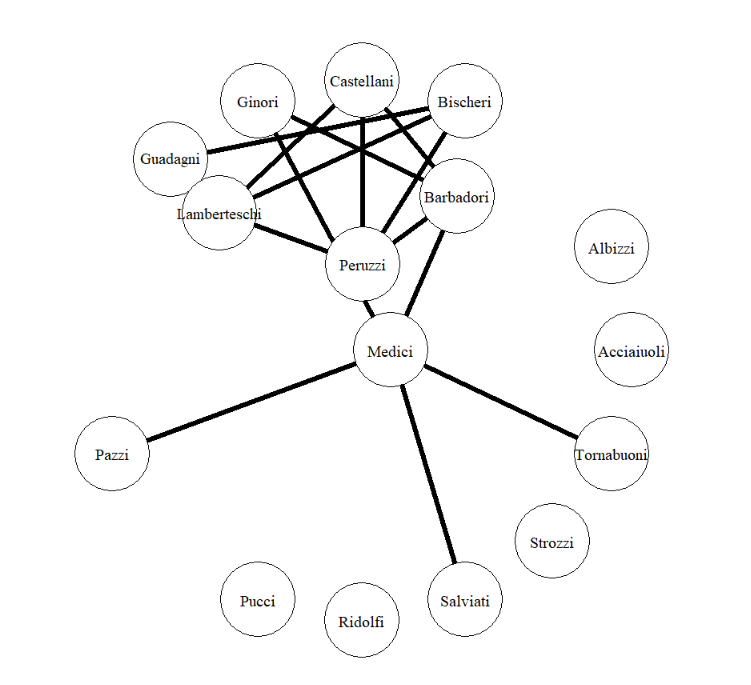

Разница между алгоритмами:

В то время как алгоритм Фрюхтермана–Рейнгольда старается держать смежные вершины на одинаковом идеальном расстоянии, Камада-Кавай рассматривает в качестве идеального расстояния между любыми вершинами соответствующее расстояние между ними по графу, вычисляемое как кратчайший путь между всеми парами вершин. Алгорим К.-К. пытается привести систему пружин в такое состояние, что минимизация энергии системы соответствует минимизации разницы сежду Евклидовым расстоянием и расстоянием по графу.

6. Выведем «описательную сводку» сети.

In [ ]:
network1 <- as.network(x = socio.matrix, directed = F, loops = F, matrix.type = "adjacency")
summary(network1)

Результат:

Network attributes:
 - vertices = 16
 - directed = FALSE
 - hyper = FALSE
 - loops = FALSE
 - multiple = FALSE
 - bipartite = FALSE
 -  total edges = 15 
 - missing edges = 0 
 - non-missing edges = 15 
 - density = 0.125 

Vertex attributes:
 - vertex.names:
 - character valued attribute
 - 16 valid vertex names

No edge attributes

Network edgelist matrix:

|       	| [,1] 	| [,2] 	|
|-------	|------	|------	|
| [1,]  	| 5    	| 3    	|
| [2,]  	| 6    	| 3    	|
| [3,]  	| 9    	| 3    	|
| [4,]  	| 11   	| 3    	|
| [5,]  	| 7    	| 4    	|
| [6,]  	| 8    	| 4    	|
| [7,]  	| 11   	| 4    	|
| [8,]  	| 8    	| 5    	|
| [9,]  	| 11   	| 5    	|
| [10,] 	| 9    	| 6    	|
| [11,] 	| 8    	| 7    	|
| [12,] 	| 11   	| 8    	|
| [13,] 	| 10   	| 9    	|
| [14,] 	| 14   	| 9    	|
| [15,] 	| 16   	| 9    	|

7. Вычислим «пятичисловую сводку» сети.

In [ ]:
print(vcount(net)) # размер сети
print(edge_density(net)) # плотность, вычисленная функцией
print(nrow(edges)/(ncol(socio.matrix)*(ncol(socio.matrix)-1)/2)) # плотность, вычисленная вручную
print(count_components(net)) # число компонент
print(diameter(net, directed = F)) # диаметр
print(transitivity(net)) # коэффициент кластеризации

Результат:
 - 16
 - 0.125
 - 0.125
 - 6
 - 5
 - 0.4166667

Выводы:
 - Размер сети совпадает с размером социоматрицы.
 - Плотность сети, вычисленная функцией, равна плотности, вычисленной вручную.
 - Число компонент, вычисленное функцией, соответствует наблюдениям.
 - Диаметр сети равен 5-ти и соответствует наблюдениям.
 - Коэффициент кластеризации равен 0.42

8. Вычислим среднюю степень узлов и дисперсию.

In [ ]:
average.deg <- sum(igraph::degree(net))/nrow(socio.matrix) # средняя степень узлов
print(average.deg) 
print(sum((igraph::degree(net)-average.deg)^2)/nrow(socio.matrix)) # дисперсия

Результат:
 - 1.875
 - 2.859375

Вывод: в среднем каждая семья ведем бизнес с одной-двумя другими семьями. Это количество варируется на 2.86

9. Заполнить таблицу для различных мер центральности.

In [ ]:
isolated <- which(igraph::degree(net)==0)
connected.graph <- igraph::delete.vertices(net, isolated) ##удаление лишних вершин

names <- igraph::get.vertex.attribute(connected.graph)
names$color <- NULL
centr.deg <- igraph::degree(connected.graph, normalized = T)
centr.close <- igraph::closeness(connected.graph, normalized = T)
centr.betw <- igraph::betweenness(connected.graph, normalized = T)
centr.info <- infocent(as.matrix(as_adjacency_matrix(connected.graph)), rescale=TRUE)

centr.df <- data.frame(names, centr.deg, centr.close, centr.betw, centr.info)
rownames(centr.df) <- NULL

print(centr.df)

Результат:

|    	| name         	| centr.deg 	| centr.close 	| centr.betw 	| centr.info 	|
|----	|--------------	|-----------	|-------------	|------------	|------------	|
| 1  	| Barbadori    	| 0.4       	| 0.5882353   	| 0.55555556 	| 0.12446815 	|
| 2  	| Bischeri     	| 0.3       	| 0.4000000   	| 0.55555556 	| 0.08898359 	|
| 3  	| Castellani   	| 0.3       	| 0.5000000   	| 0.11111111 	| 0.10457651 	|
| 4  	| Ginori       	| 0.2       	| 0.4545455   	| 0.00000000 	| 0.09531249 	|
| 5  	| Guadagni     	| 0.2       	| 0.3125000   	| 0.00000000 	| 0.07656303 	|
| 6  	| Lamberteschi 	| 0.4       	| 0.4166667   	| 0.13333333 	| 0.09837087 	|
| 7  	| Medici       	| 0.5       	| 0.5263158   	| 0.53333333 	| 0.11089878 	|
| 8  	| Pazzi        	| 0.1       	| 0.3571429   	| 0.00000000 	| 0.06388631 	|
| 9  	| Peruzzi      	| 0.4       	| 0.5263158   	| 0.30000000 	| 0.10916767 	|
| 10 	| Salviati     	| 0.1       	| 0.3571429   	| 0.00000000 	| 0.06388631 	|
| 11 	| Tornabuoni   	| 0.1       	| 0.3571429   	| 0.00000000 	| 0.06388631 	|

Вывод: исходя из данных о центральности, самой важной семьей по степени является Medici, по близости и информации - Barbadori, по посредничеству - Barbadori и Bischeri.

10. Вычислим значение централизации для каждой меры.

In [ ]:
centr.deg.total <- centr_degree(connected.graph)[2]
centr.close.total <- centr_clo(connected.graph)[2]
centr.betw.total <- centr_betw(connected.graph)[2]
centr.info.total <- (1/vcount(connected.graph)) * sum((centr.info - sum(centr.info))^2)
print(centr.deg.total)
print(centr.close.total)
print(centr.betw.total)
print(centr.info.total)

Результат:
 - 0.2272727
 - 0.3535226
 - 0.4422222
 - 0.8268573
 
Вывод: с помощью возможностей языка R были посчитаны централизации для различных мер.

11. Выявим точки сочленения и мосты сети.

In [ ]:
print(articulation.points(net)) # точки сочленения
print(bridges(net)) # мосты
V(net)$color <- "white"
V(net)$color[ articulation.points(net) ] <- "red"
E(net)$color <- "black"
E(net)$color[bridges(net)] <- "blue"

plot(net, layout = layout.fruchterman.reingold, vertex.label = V(net)$name, vertex.size = 15, vertex.color= V(net)$color, 
vertex.frame.color= "black", vertex.label.color = "black", edge.width=5, edge.color=E(net)$color)

Результат:

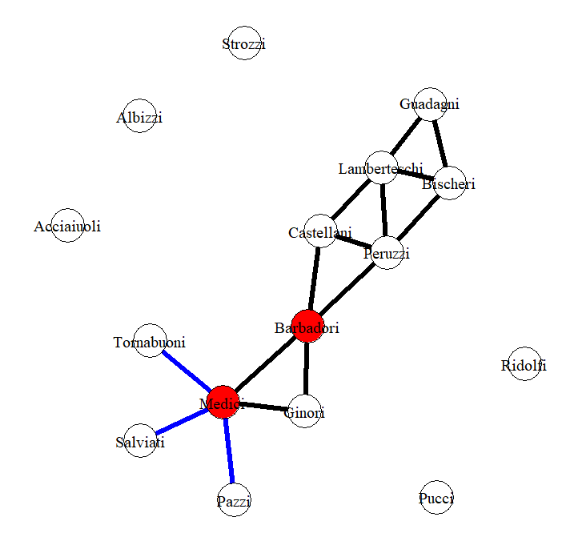

Вывод: Значения, полученные с помощью функций, соответствуют наблюдениям.

12. Выполним пп. 2–8 для направленной сети из файла krackhardt_advice.csv

In [ ]:
data2 <- read.table("krackhardt_advice.csv", header=FALSE, sep = ',')
colnames(data2) <- c(1:ncol(data2))

# П2.
DF2 <- data.frame(data2)
socio.matrix2 <- data.matrix(DF2)
edges2 <- get.edgelist(graph.adjacency(socio.matrix2))
print(edges2[c(1:5), c(1:2)])

Результат:

|      	| [,1] 	| [,2]  	|
|------	|------	|-------	|
| [1,] 	| "X1" 	| "X2"  	|
| [2,] 	| "X1" 	| "X4"  	|
| [3,] 	| "X1" 	| "X8"  	|
| [4,] 	| "X1" 	| "X16" 	|
| [5,] 	| "X1" 	| "X18" 	|

In [ ]:
# П3. В файле нет имен узлов.
# П4.
net2 <- graph_from_adjacency_matrix(socio.matrix2, mode = "directed")

In [ ]:
# П5.
coords2 <- layout_with_fr(net2)
plot(net2, layout=coords2, vertex.size=20, edge.width = 1, edge.arrow.size = 0.2, rescale=FALSE, xlim=range(coords2[,1]), 
ylim=range(coords2[,2]), vertex.label.dist=0, vertex.label.color="black", vertex.color = "blue", edge.color = "black")

Результат:

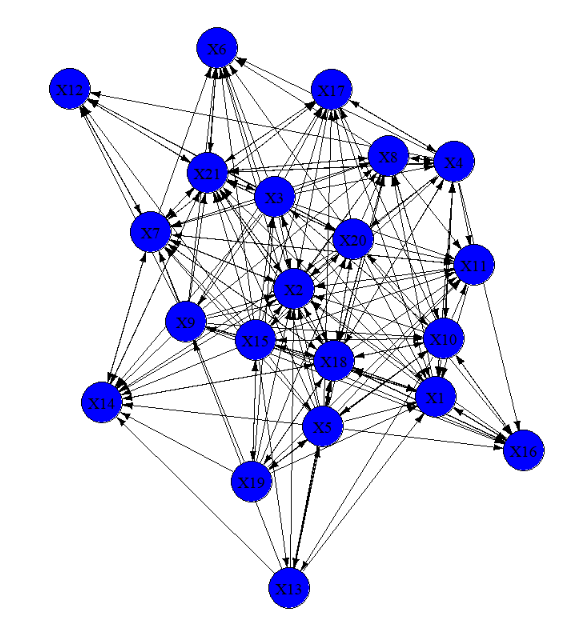

In [ ]:
# П5.
coords2 <- layout_with_kk(net2)
plot(net2, layout=coords2, vertex.size=20, edge.width = 1, edge.arrow.size = 0.2, rescale=FALSE, xlim=range(coords2[,1]), 
ylim=range(coords2[,2]), vertex.label.dist=0, vertex.label.color="black", vertex.color = "blue", edge.color = "black")

Результат:

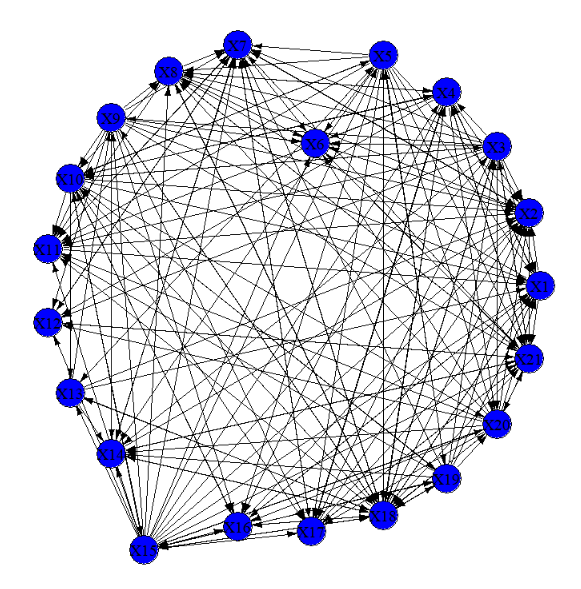

In [ ]:
# П6
network2 <- as.network(x = socio.matrix2, directed = T, loops = F, matrix.type = "adjacency")
summary(network2)

Результат:

 Network attributes:
 
 - vertices = 21
 - directed = TRUE
 - hyper = FALSE
 - loops = FALSE
 - multiple = FALSE
 - bipartite = FALSE
 - total edges = 190 
 - missing edges = 0 
 - non-missing edges = 190 
 - density = 0.452381 

Vertex attributes:
 - vertex.names:
 - character valued attribute
 - 21 valid vertex names

No edge attributes

In [ ]:
# П7.
print(vcount(net2)) # размер сети
print(edge_density(net2)) # плотность, вычисленная функцией
print(nrow(edges2)/(ncol(socio.matrix2)*(ncol(socio.matrix2)-1))) # плотность, вычисленная вручную
print(count_components(net2)) # число компонент
print(diameter(net2, directed = T)) # диаметр
print(transitivity(net2))

Результат:
 - 21
 - 0.452381
 - 0.452381
 - 1
 - 3
 - 0.7345088

In [ ]:
# П8.
average.deg.in <- sum(igraph::degree(net2, mode = "in"))/nrow(socio.matrix2) # средняя степень узлов (входящие)
average.deg.out <- sum(igraph::degree(net2, mode = "out"))/nrow(socio.matrix2) # средняя степень узлов (исходящие)

print(average.deg.in) 
print(average.deg.out) 
print(sum((igraph::degree(net2, mode = "in")-average.deg.in)^2)/nrow(socio.matrix2)) # дисперсия (входящие)
print(sum((igraph::degree(net2, mode = "out")-average.deg.out)^2)/nrow(socio.matrix2)) # дисперсия (исходящие)

Результат:
 - 9.047619
 - 9.047619
 - 15.75964
 - 28.33107

Выводы: 
 - Cредние степени входящих и исходящих связей совпадают (так как число входящих ребер равно числу исходящих).
 - Дисперсии входящих и исходящих связей различаются, так как разброс может быть разным независимо от совпадения количества связей.

13. Заполним таблицу для различных мер престижа.

In [ ]:
##Престиж по степени
deg.prestige <- prestige(network2, cmode = "indegree")
deg.prestige <- deg.prestige/(gorder(net2) - 1)

##Престиж по информации
geo <- geodist(network2)$gdist #геодезические расстояния
geo <- geo[!is.infinite(rowSums(geo)), ] #Удаляем все вершины без исходящих связей

close.prestige <- (nrow(geo)/(gorder(net2) - 1))/(colSums(geo)/nrow(geo))

prestige.df <- data.frame(n_i = colnames(socio.matrix2), deg.prestige, close.prestige)
print(prestige.df)

Результат:

|    	| n_i 	| deg.prestige 	| close.prestige 	|
|----	|-----	|--------------	|----------------	|
| 1  	| X1  	| 0.65         	| 0.7350000      	|
| 2  	| X2  	| 0.90         	| 1.0022727      	|
| 3  	| X3  	| 0.25         	| 0.6125000      	|
| 4  	| X4  	| 0.40         	| 0.6890625      	|
| 5  	| X5  	| 0.25         	| 0.5512500      	|
| 6  	| X6  	| 0.50         	| 0.7350000      	|
| 7  	| X7  	| 0.65         	| 0.8166667      	|
| 8  	| X8  	| 0.50         	| 0.7350000      	|
| 9  	| X9  	| 0.20         	| 0.5378049      	|
| 10 	| X10 	| 0.45         	| 0.6300000      	|
| 11 	| X11 	| 0.55         	| 0.7350000      	|
| 12 	| X12 	| 0.35         	| 0.6485294      	|
| 13 	| X13 	| 0.20         	| 0.5378049      	|
| 14 	| X14 	| 0.50         	| 0.7350000      	|
| 15 	| X15 	| 0.20         	| 0.5378049      	|
| 16 	| X16 	| 0.40         	| 0.6300000      	|
| 17 	| X17 	| 0.45         	| 0.7112903      	|
| 18 	| X18 	| 0.75         	| 0.8820000      	|
| 19 	| X19 	| 0.20         	| 0.5378049      	|
| 20 	| X20 	| 0.40         	| 0.6681818      	|
| 21 	| X21 	| 0.75         	| 0.8820000      	|

Выводы:
 - Наибольший престиж по степени и близости имеет узел 2, что соответствует наблюдениям.

## Выводы

В ходе выполнения данной практической работы мы проанализировали социальные сети с помощью возможностей языка R и его библиотек. Мы овладели навыками работы с математическими пакетами для моделирования, визуализации и анализа социальных сетей.
Были изучены алгоритмы Фрюхтермана-Рейнгольда и Камада-Каваи и с их помощью визуализированы сети, направленные и ненаправленные.
Анализ характеристик, проведенный для каждой сети, был приведен в отчете.